In [1]:
import numpy as np
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import torch 
from training.networks import  define_G
import seaborn as sns
import sys
sys.path.append('../')

from training.model import * #Generator,Discriminator
from training.model_unet import * #Generator,Discriminator
from training.database import *
from training.utils import *
# from code.database import ImageDataset

import numpy as np
import gc
import os
import sys
import cv2

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
from torchvision.transforms.functional import to_pil_image

import itertools
from PIL import Image

import random

from tqdm import tqdm


ModuleNotFoundError: No module named 'training'

In [ ]:

plt.style.use("ggplot")     # グラフのデザインを指定する
sns.set_palette('Set2')     # グラフの色を指定する

import warnings
warnings.filterwarnings('ignore') # 警告メッセージを出ないようにしている

# Compare RMSE
---

In [ ]:
path1="../output/analysis/cyclegan_pytorch/rmse_cossim_data.pkl"
path2="../output/analysis/cyclegan_unpaired_ver5.1.0/rmse_cossim_data.pkl"
df1=pd.read_pickle(path1)
df2=pd.read_pickle(path2)

In [ ]:
display(df1.head())
display(df2.head())

,rmse,cos_sim
0,9.900259,6.016121e-07
1,9.974891,6.302323e-07
2,11.174098,1.088807e-07
3,9.910520,4.081053e-07
4,10.234939,6.306073e-08


,rmse,cos_sim
0,9.537980,3.718836e-07
1,9.244562,8.682515e-07
2,9.015011,5.717109e-07
3,9.219338,5.752897e-07
4,8.962821,2.207015e-07


In [ ]:
df1.describe()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,10.282447,5.907736e-07
std,0.663706,4.650229e-07
min,7.183074,4.763019e-09
25%,9.985244,1.987778e-07
50%,10.358098,4.820258e-07
75%,10.699393,8.705487e-07
max,11.949320,1.967130e-06


In [ ]:
df2.describe()
# df2.rmse.median()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,8.483480,9.488038e-07
std,1.414287,7.979452e-07
min,3.869243,2.994790e-08
25%,7.806676,3.476503e-07
50%,8.927419,7.721292e-07
75%,9.572852,1.281283e-06
max,10.360497,4.145323e-06


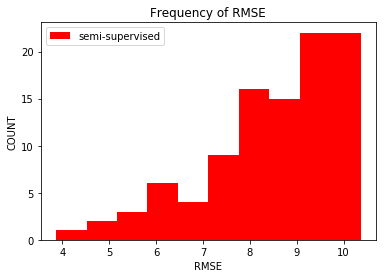

In [ ]:
plt.hist(df2.rmse,bins=10, histtype='stepfilled',label="semi-supervised", color='r')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

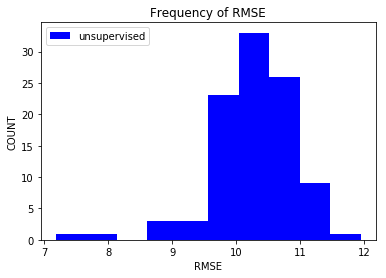

In [ ]:
plt.hist(df1.rmse,bins=10, histtype='stepfilled',label="unsupervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

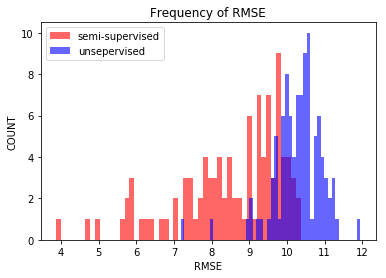

In [ ]:
plt.hist(df2.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="semi-supervised", color='r')
plt.hist(df1.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="unsepervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

# Compare Image
---

In [ ]:
def get_images(folder,num=10):
    fake_path=os.listdir(folder+"fake")
    depth_path=os.listdir(folder+"depth")
    color_path=os.listdir(folder+"color")
    images={"fake":[],"depth":[],"color":[]}
    for i in range(num):
        fake=cv2.imread(f"{folder}fake/{fake_path[i]}",0)
        depth=cv2.imread(f"{folder}depth/{depth_path[i]}",0)
        color=cv2.imread(f"{folder}color/{color_path[i]}")
        images["fake"].append(fake)
        images["depth"].append(depth)
        images["color"].append(color)
    return images

In [ ]:
im_path1="../output/analysis/cyclegan_pytorch/"
im_path2="../output/analysis/cyclegan_unpaired_ver5.1.0/"

im_semi=get_images(im_path2)
im_un=get_images(im_path1)

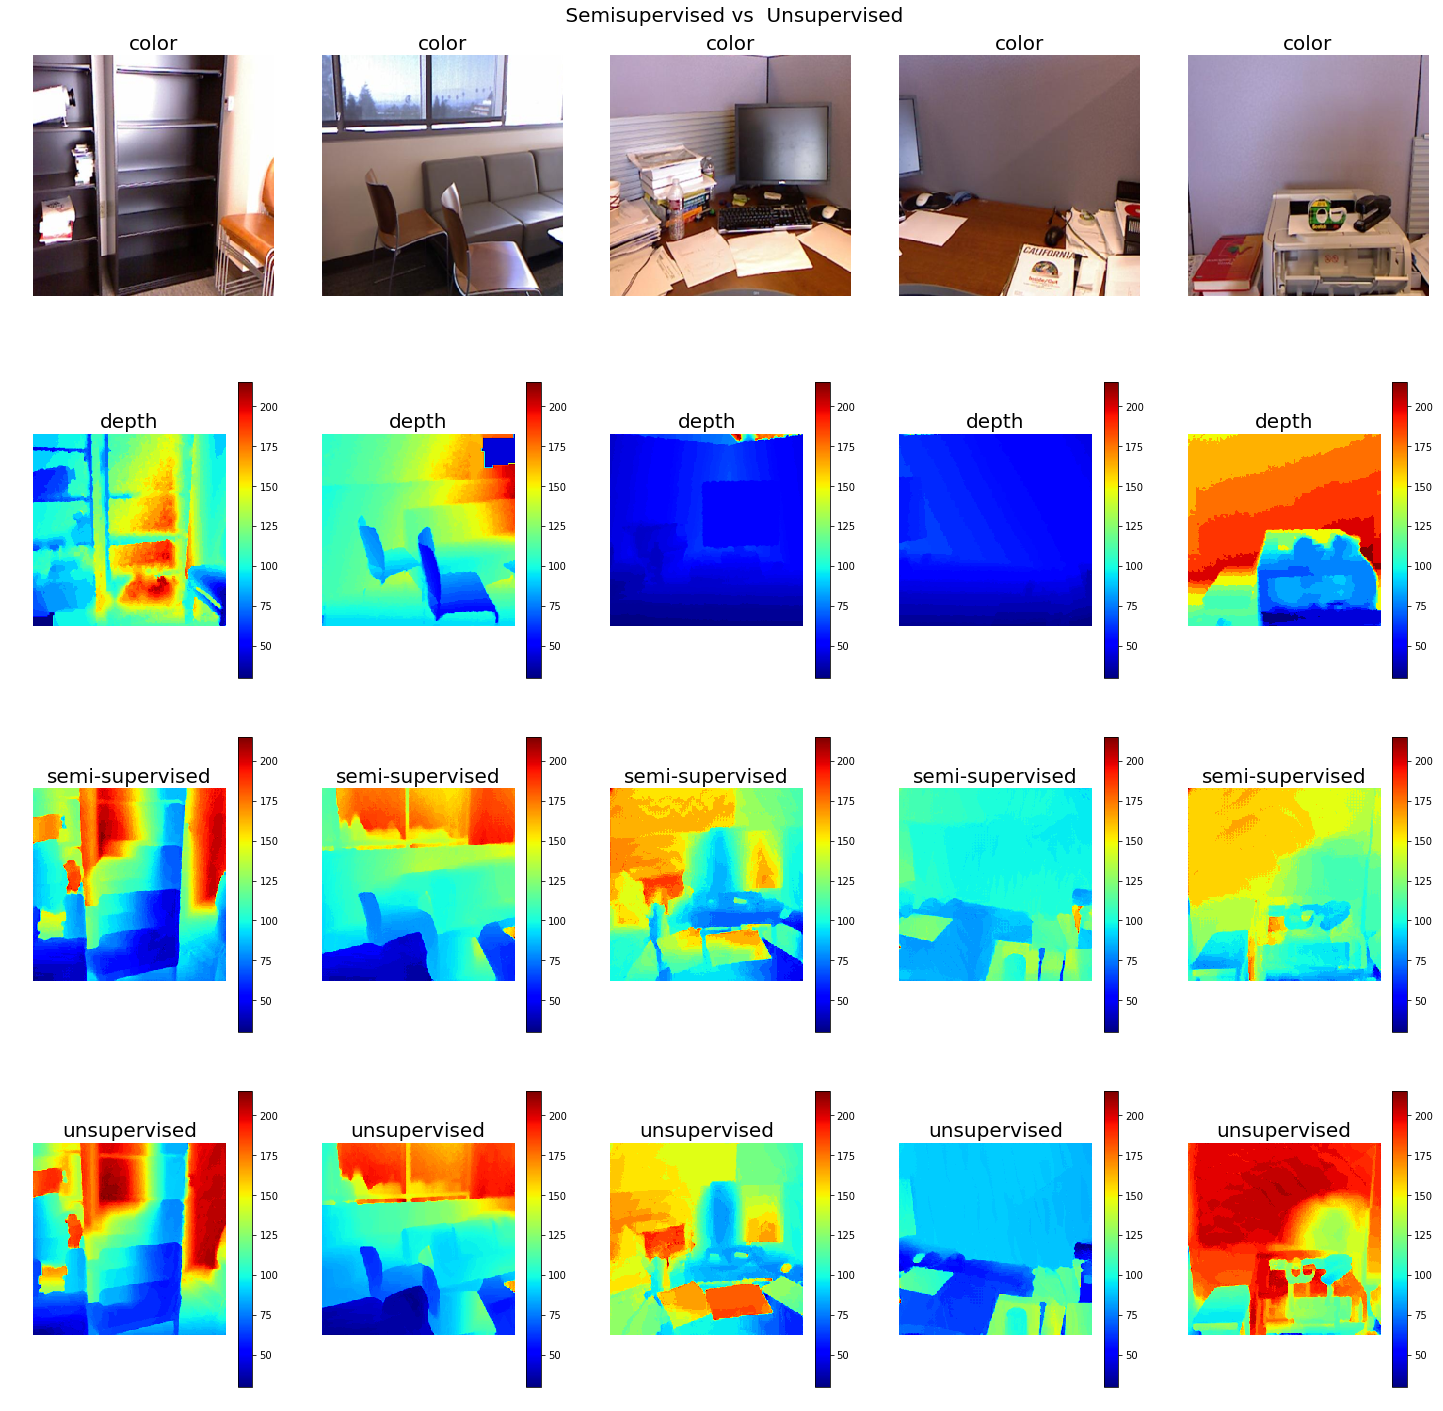

In [ ]:
fig=plt.figure(figsize=(25,25))
plt.title(" Semisupervised vs  Unsupervised",fontsize=20)
plt.axis("off")
for i in range(5):
    ax=fig.add_subplot(4,5,i+1)
    ax.set_title("color",fontsize=20)
    ax.imshow(im_semi["color"][i])
    ax.axis("off")

    ax=fig.add_subplot(4,5,i+1+5)
    ax.set_title("depth",fontsize=20)
    a=ax.imshow(im_semi["depth"][i],cmap="jet")
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5)
    ax.set_title("semi-supervised",fontsize=20)
    a=ax.imshow(im_semi["fake"][i],cmap="jet")
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5+5)
    ax.set_title("unsupervised",fontsize=20)
    a=ax.imshow(im_un["fake"][i],cmap="jet")
    ax.axis("off")
    fig.colorbar(a, ax=ax)
    